In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/Aug_train_ds.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import shutil
import os

# Define source and destination paths
src_A = '/content/Mild'  # Change this to the path of folder A
src_B = '/content/Moderate'  # Change this to the path of folder B
src_C = '/content/No_DR'  # Change this to the path of folder A
src_D = '/content/Proliferate_DR'  # Change this to the path of folder B
src_E = '/content/Severe'  # Change this to the path of folder A

dest = '/content/Aug_train'  # Destination folder

# Create the destination folder if it doesn't exist
if not os.path.exists(dest):
    os.makedirs(dest)

# Move the A and B folders to the train folder
shutil.move(src_A, dest)
shutil.move(src_B, dest)
shutil.move(src_C, dest)
shutil.move(src_D, dest)
shutil.move(src_E, dest)


print("Folders moved successfully!")


Folders moved successfully!


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/test.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import shutil
import os

# Define source and destination paths
src_A = '/content/Mild'  # Change this to the path of folder A
src_B = '/content/Moderate'  # Change this to the path of folder B
src_C = '/content/No_DR'  # Change this to the path of folder A
src_D = '/content/Proliferate_DR'  # Change this to the path of folder B
src_E = '/content/Severe'  # Change this to the path of folder A

dest = '/content/test'  # Destination folder

# Create the destination folder if it doesn't exist
if not os.path.exists(dest):
    os.makedirs(dest)

# Move the A and B folders to the train folder
shutil.move(src_A, dest)
shutil.move(src_B, dest)
shutil.move(src_C, dest)
shutil.move(src_D, dest)
shutil.move(src_E, dest)


print("Folders moved successfully!")

Folders moved successfully!


In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications import ResNet152V2

In [ ]:
conv_base = keras.applications.ResNet152V2(
    include_top= False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(150,150,3),
    pooling=None,
    classes=5,
    classifier_activation="softmax",

)

In [ ]:
conv_base.summary()

Model: "resnet152v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 156, 156, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 75, 75, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 77, 77, 64)     │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 38, 38, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 38, 38, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 38, 38, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 38, 38, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 40, 40, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 38, 38, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 58,331,648 (222.52 MB)

 Trainable params: 58,187,904 (221.97 MB)

 Non-trainable params: 143,744 (561.50 KB)

In [ ]:
 model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.build(input_shape=(None,150,150,3))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet152v2 (Functional)             │ (None, 5, 5, 2048)          │      58,331,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      13,107,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,440,389 (272.52 MB)

 Trainable params: 71,296,645 (271.98 MB)

 Non-trainable params: 143,744 (561.50 KB)

In [ ]:
conv_base.trainable = False

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/content/Aug_train_ds',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(150,150)
)

Found 103265 files belonging to 5 classes.
Found 2910 files belonging to 5 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

NameError: name 'model' is not defined

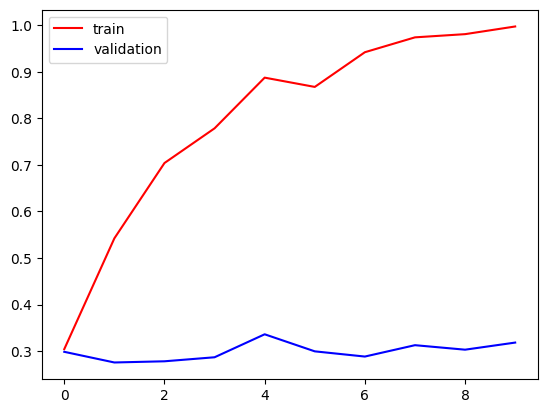

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


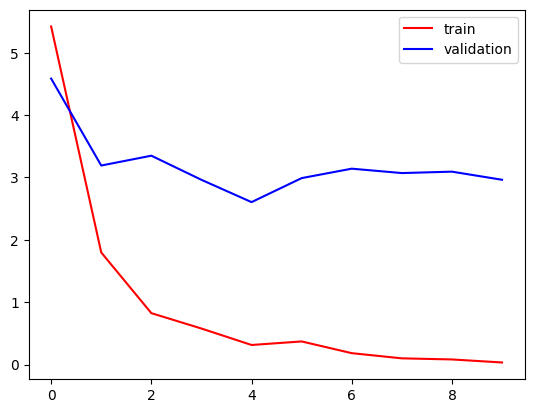

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#model evaluation on training set
train_loss,train_accuracy = model.evaluate(train_ds)

91/91 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - accuracy: 1.0000 - loss: 0.0245


In [ ]:
#model evaluation on validation set
train_loss,train_accuracy = model.evaluate(validation_ds)

62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.3267 - loss: 2.8477


In [ ]:
# Print class names
class_names = train_ds.class_names
print("Class names in training set:", train_ds.class_names)
print("Class names in validation set:", validation_ds.class_names)


Class names in training set: ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']
Class names in validation set: ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']


In [ ]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(150,150)
)


Found 1964 files belonging to 5 classes.


In [ ]:
Pred = model.predict(test_ds)
Pred,Pred.shape

62/62 ━━━━━━━━━━━━━━━━━━━━ 30s 286ms/step


(array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.7006394e-18,
         0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 2.4837472e-35,
         0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
         0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 2.1861965e-27,
         0.0000000e+00]], dtype=float32),
 (1964, 5))

In [ ]:
import tensorflow as tf
predicated_classes = tf.argmax(Pred, axis=1)
predicated_classes

<tf.Tensor: shape=(1964,), dtype=int64, numpy=array([2, 3, 2, ..., 2, 3, 2])>

In [ ]:
true_classes = tf.concat([y for x, y in test_ds], axis=0)
true_classes

<tf.Tensor: shape=(1964, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_classes, axis=1)
Y_true


<tf.Tensor: shape=(1964,), dtype=int64, numpy=array([0, 3, 1, ..., 0, 2, 1])>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(Y_true, predicated_classes,target_names=class_names))

                precision    recall  f1-score   support

          Mild       0.20      0.00      0.00       485
      Moderate       0.00      0.00      0.00       582
         No_DR       0.30      0.47      0.37       582
Proliferate_DR       0.07      0.58      0.13       126
        Severe       0.00      0.00      0.00       189

      accuracy                           0.18      1964
     macro avg       0.11      0.21      0.10      1964
  weighted avg       0.14      0.18      0.12      1964



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/Aug_train_ds.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import shutil
import os

# Define source and destination paths
src_A = '/content/Mild'  # Change this to the path of folder A
src_B = '/content/Moderate'  # Change this to the path of folder B
src_C = '/content/No_DR'  # Change this to the path of folder A
src_D = '/content/Proliferate_DR'  # Change this to the path of folder B
src_E = '/content/Severe'  # Change this to the path of folder A

dest = '/content/train'  # Destination folder

# Create the destination folder if it doesn't exist
if not os.path.exists(dest):
    os.makedirs(dest)

# Move the A and B folders to the train folder
shutil.move(src_A, dest)
shutil.move(src_B, dest)
shutil.move(src_C, dest)
shutil.move(src_D, dest)
shutil.move(src_E, dest)


print("Folders moved successfully!")


Folders moved successfully!


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/test.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import shutil
import os

# Define source and destination paths
src_A = '/content/Mild'  # Change this to the path of folder A
src_B = '/content/Moderate'  # Change this to the path of folder B
src_C = '/content/No_DR'  # Change this to the path of folder A
src_D = '/content/Proliferate_DR'  # Change this to the path of folder B
src_E = '/content/Severe'  # Change this to the path of folder A

dest = '/content/test'  # Destination folder

# Create the destination folder if it doesn't exist
if not os.path.exists(dest):
    os.makedirs(dest)

# Move the A and B folders to the train folder
shutil.move(src_A, dest)
shutil.move(src_B, dest)
shutil.move(src_C, dest)
shutil.move(src_D, dest)
shutil.move(src_E, dest)


print("Folders moved successfully!")

Folders moved successfully!


In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications import ResNet152V2

In [ ]:
conv_base = keras.applications.ResNet152V2(
    include_top= False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(150,150,3),
    pooling=None,
    classes=5,
    classifier_activation="softmax",

)

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [ ]:
conv_base.summary()

Model: "resnet152v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 156, 156, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 75, 75, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 77, 77, 64)     │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 38, 38, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 38, 38, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 38, 38, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 38, 38, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 40, 40, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 38, 38, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 38, 38, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 58,331,648 (222.52 MB)

 Trainable params: 58,187,904 (221.97 MB)

 Non-trainable params: 143,744 (561.50 KB)

In [ ]:
 model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.build(input_shape=(None,150,150,3))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet152v2 (Functional)             │ (None, 5, 5, 2048)          │      58,331,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      13,107,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,440,389 (272.52 MB)

 Trainable params: 71,296,645 (271.98 MB)

 Non-trainable params: 143,744 (561.50 KB)

In [ ]:
conv_base.trainable = False

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(150,150)
)

Found 2910 files belonging to 5 classes.
Found 1964 files belonging to 5 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 74s 458ms/step - accuracy: 0.2779 - loss: 8.7191 - val_accuracy: 0.2984 - val_loss: 4.5852
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 47s 199ms/step - accuracy: 0.5425 - loss: 1.9361 - val_accuracy: 0.2755 - val_loss: 3.1917
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 201ms/step - accuracy: 0.6849 - loss: 0.9013 - val_accuracy: 0.2780 - val_loss: 3.3492
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 18s 194ms/step - accuracy: 0.7739 - loss: 0.5653 - val_accuracy: 0.2867 - val_loss: 2.9627
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 192ms/step - accuracy: 0.8821 - loss: 0.3261 - val_accuracy: 0.3360 - val_loss: 2.6051
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - accuracy: 0.8523 - loss: 0.4167 - val_accuracy: 0.2994 - val_loss: 2.9900
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 232ms/step - accuracy: 0.9425 - loss: 0.1818 - val_accuracy: 0.2882 - val_loss: 3.1412
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 37s 192ms/step - accuracy: 0.9712 - loss: 0.1116 - val_accu

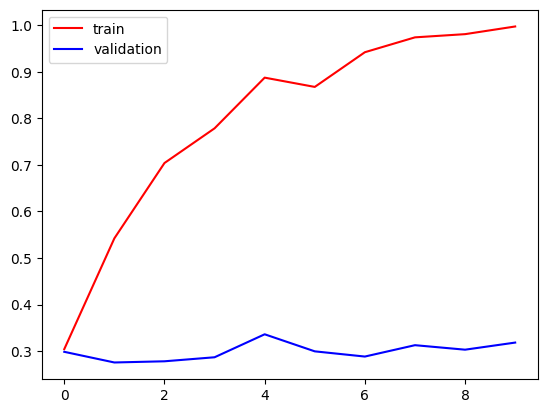

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


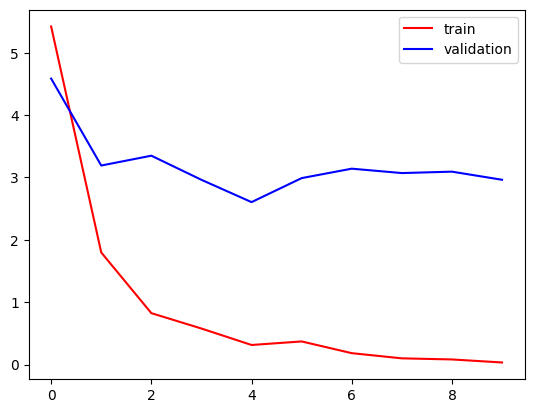

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#model evaluation on training set
train_loss,train_accuracy = model.evaluate(train_ds)

91/91 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - accuracy: 1.0000 - loss: 0.0245


In [ ]:
#model evaluation on validation set
train_loss,train_accuracy = model.evaluate(validation_ds)

62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.3267 - loss: 2.8477


In [ ]:
# Print class names
class_names = train_ds.class_names
print("Class names in training set:", train_ds.class_names)
print("Class names in validation set:", validation_ds.class_names)


Class names in training set: ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']
Class names in validation set: ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']


In [ ]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(150,150)
)


Found 1964 files belonging to 5 classes.


In [ ]:
Pred = model.predict(test_ds)
Pred,Pred.shape

62/62 ━━━━━━━━━━━━━━━━━━━━ 30s 286ms/step


(array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.7006394e-18,
         0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 2.4837472e-35,
         0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
         0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 2.1861965e-27,
         0.0000000e+00]], dtype=float32),
 (1964, 5))

In [ ]:
import tensorflow as tf
predicated_classes = tf.argmax(Pred, axis=1)
predicated_classes

<tf.Tensor: shape=(1964,), dtype=int64, numpy=array([2, 3, 2, ..., 2, 3, 2])>

In [ ]:
true_classes = tf.concat([y for x, y in test_ds], axis=0)
true_classes

<tf.Tensor: shape=(1964, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_classes, axis=1)
Y_true


<tf.Tensor: shape=(1964,), dtype=int64, numpy=array([0, 3, 1, ..., 0, 2, 1])>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(Y_true, predicated_classes,target_names=class_names))

                precision    recall  f1-score   support

          Mild       0.20      0.00      0.00       485
      Moderate       0.00      0.00      0.00       582
         No_DR       0.30      0.47      0.37       582
Proliferate_DR       0.07      0.58      0.13       126
        Severe       0.00      0.00      0.00       189

      accuracy                           0.18      1964
     macro avg       0.11      0.21      0.10      1964
  weighted avg       0.14      0.18      0.12      1964



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
